# 简介

https://www.datafountain.cn/competitions/311
    
一等奖团队分享|2018 CCF BDCI《面向电信行业存量用户的智能套餐个性化匹配模型》 
https://mp.weixin.qq.com/s?__biz=MzI5ODQxMTk5MQ==&mid=2247485591&idx=1&sn=3ec0cd3ae86996e6e6438d65ac1087bf&chksm=eca77a2fdbd0f3391580bfa8cc4e312b19cd1016ef29f639cace4c48718387f4a9c40805ada0&scene=21#wechat_redirect

## 赛题任务

此题利用已有的用户属性(如个人基本信息、用户画像信息等)、终端属性(如终端品牌等)、业务属性、消费习惯及偏好匹配用户最合适的套餐，对用户进行推送，完成后续个性化服务。

## 数据与评测

    9月25数据更新说明：
    因数据中排序存在强关联特征， 对数据做如下更新

        重新发布新的测试数据集， 请参赛者下载新的测试数据集。
        原测试数据集会合并到训练集中增大训练集的数量。 （训练集中移除了套餐类型为"99104722",“89016259”,“89016253”,"89016252"的训练数据。）
        
![](imgs/tc01.png)

## 作品要求

提交CSV文件，sample_submission.csv为提交的结果文件，有2列，分别为“用户编号”和“预测的用户套餐类型” 。

## 评分方式
本模型依据提交的结果文件，采用宏平均F1-score进行评价。

（1）针对每个用户套餐类别，分别统计TP（预测答案正确），FP（错将其他类预测为本类），FN（本类标签预测为其他类标）。
（2）通过第一步的统计值计算每个类别下的precision和recall，计算公式如下：
$$precision_k=\frac{TP}{TP+FP}$$

$$recall_k=\frac{TP}{TP+FN}$$
（3）通过第二步计算结果计算每个类别下的F1-score,计算方式如下：
$$f1_k=\frac{2∗precision_k∗recall_k}{precision_k+recall_k}$$
（4）通过第三步求得的各个类别下的F1-score 求均值，得到最后的评测结果，计算方式如下：
$$score = (\frac{1}{n}\sum_{k=0}^nf1_k)^2$$

# EDA

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

In [5]:
import seaborn as sns
sns.set(font='Arial Unicode MS')  # 解决Seaborn中文显示问题

import sys
sys.path.append('/Users/luoyonggui/PycharmProjects/mayiutils_n1/mayiutils/data_prepare')

from data_explore import DataExplore as de

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## load data

In [46]:
df = pd.read_csv('data_origin/train_all.csv')

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4,5,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.shape

(743990, 27)

In [4]:
df.head()

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,contract_time,is_promise_low_consume,net_service,pay_times,pay_num,last_month_traffic,local_trafffic_month,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee,current_service,user_id
0,4,0,85,295.96,296.2,296,296.80,3813.614698,0,1,36,0,4,2,300.04,4096.000000,1392.038508,108.100000,0.000000,564.366667,1,31,0,0,0.0,99999825,Gx4sJzcQog01UhZL
1,1,0,10,265.20,261.2,208.5,174.50,0.000000,1,0,0,0,4,3,300.00,0.000000,62852.509718,240.100000,355.166667,0.000000,1,30,0,0,0.0,90063345,kEXrhTiug93DIcLG
2,1,0,12,44.50,70.2,69,61.40,2598.397406,0,0,0,0,4,4,50.00,0.000000,1935.242104,27.666667,0.000000,98.416667,2,25,0,0,0.0,90109916,AouXr0EOUtSRdiYK
3,4,0,134,87.95,81.4,76,88.30,988.440563,0,0,0,0,4,1,100.00,37.336425,988.561075,89.900000,74.483333,121.833333,1,44,0,0,0.0,89950166,Yds7U30hnRZDiLtb
4,4,0,84,317.04,314.08,435.51,413.05,5885.800642,0,1,24,0,4,12,1000.03,3305.741127,0.000000,0.000000,35.100000,496.733333,1,31,2,1,0.0,99999825,OFDTSXrhN9Q2mbVw


## describe

In [9]:
de.describe(df)

num of records: 743990, num of columns: 27


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
service_type,int64,2,0,0.0,4,396638,53.3123,2.59937,1.49671,1,1,4,4,4
is_mix_service,int64,2,0,0.0,0,712752,95.8013,0.0419871,0.20056,0,0,0,0,1
online_time,int64,273,0,0.0,10,37286,5.01163,42.1632,45.5263,1,10,17,65,274
1_total_fee,float64,36773,0,0.0,76,20805,2.79641,105.317,90.6615,0,52.2,76,127.45,5940.83
2_total_fee,object,47223,0,0.0,76,18528,2.49036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_total_fee,object,47046,0,0.0,76,19334,2.59869,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4_total_fee,float64,39820,0,0.0,76,14237,1.9136,110.91,102.791,-420.27,51.6,78.4,137,5141.27
month_traffic,float64,363439,0,0.0,0,312501,42.0034,1280.31,2865.05,0,0,300,1535.36,159057
many_over_bill,int64,2,0,0.0,0,393246,52.8564,0.471436,0.499184,0,0,0,1,1
contract_type,int64,9,0,0.0,0,425806,57.2328,1.73379,3.14524,0,0,0,3,12


## label

此问题是一个多分类问题，对应着有11种套餐，其中他们的分布较为不均匀。

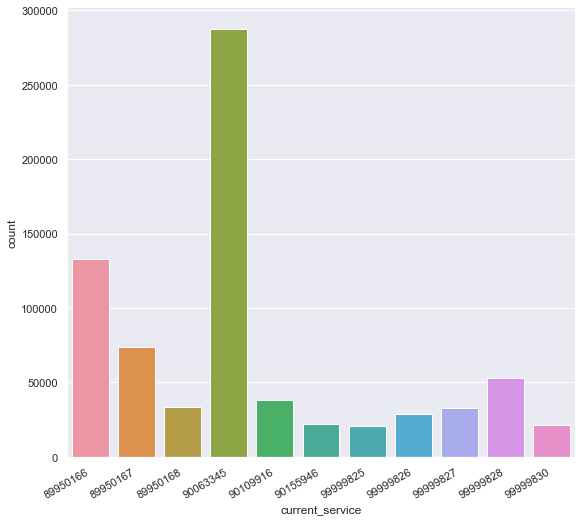

In [16]:
sns.catplot(x='current_service', kind='count', data=df, height=8).fig.autofmt_xdate()

## service_type
我们可以得到一个明显的规律，如图2所示，service_type可以将套餐分为两个部分，这两部分是没有交叉的，其中一类有8个，另外一类有3个。这给我们比赛带来一个思路是，可以分模型预测，在最后的实验中我们也通过此取得了提升。

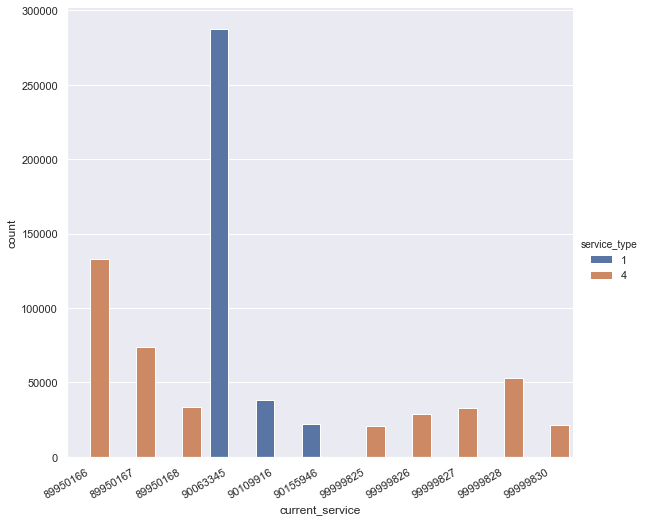

In [17]:
sns.catplot(x='current_service', hue='service_type', kind='count', data=df, height=8).fig.autofmt_xdate()

## age
我们可以看到对于年龄来讲，基本上符合电信用户群体的分布，但是有很多0岁的异常值，对于异常值，我们尝试了替换service_typpe字段对应的均值和使用原始值两种方法。最终选取了原始值，我们认为默认年龄在不同套餐中的转换率呈现了分布差异。

In [47]:
# 处理脏数据
df.loc[df.age=='\\N', 'age'] = None
df.loc[:, 'age'] = df.age.map(int, na_action='ignore')

In [34]:
df.age.value_counts()

28.0    42302
27.0    34460
26.0    31504
25.0    31133
29.0    30986
23.0    30359
24.0    30116
22.0    29780
30.0    29445
31.0    26038
21.0    25329
0.0     21946
20.0    21835
32.0    21499
33.0    19560
35.0    19371
19.0    19096
34.0    18956
36.0    18855
38.0    15160
18.0    15039
37.0    14499
39.0    14340
40.0    13029
41.0    12205
42.0    12198
45.0    11511
43.0    11422
44.0    11384
46.0    10700
47.0    10416
17.0    10211
48.0     9656
49.0     9345
50.0     6966
51.0     5819
52.0     5764
54.0     5367
53.0     4973
55.0     4780
56.0     2941
16.0     2900
57.0     2343
60.0     2335
58.0     2320
59.0     2044
61.0     1937
62.0     1606
63.0     1575
64.0     1284
65.0      978
66.0      837
67.0      638
69.0      550
68.0      549
70.0      385
71.0      310
72.0      231
73.0      173
74.0      152
75.0      111
76.0       75
77.0       59
78.0       54
79.0       37
15.0       36
81.0       27
80.0       26
82.0       25
83.0       21
85.0       17
84.0  

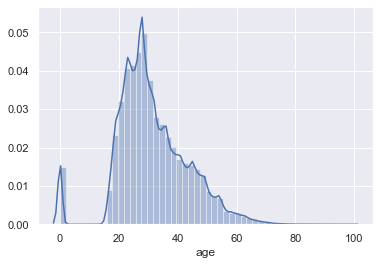

In [37]:
sns.distplot(df['age'].dropna())

## gender
我们观察到性别中有0 的缺省值，对于这部分，我们使用了两种方法处理，一种是填充service_type对应字段的众数，和原始值。最终我们选取了原始值，我们认为默性别在不同套餐中的转换率呈现了分布差异。

In [45]:
df.gender.value_counts()

1     460291
2     197236
1      41013
0      20927
2      17220
01      3671
0       1830
02      1647
00       153
\N         2
Name: gender, dtype: int64

In [48]:
#处理脏数据
df.loc[df.gender=='\\N', 'gender'] = None
df.loc[:, 'gender'] = df.gender.map(int, na_action='ignore')

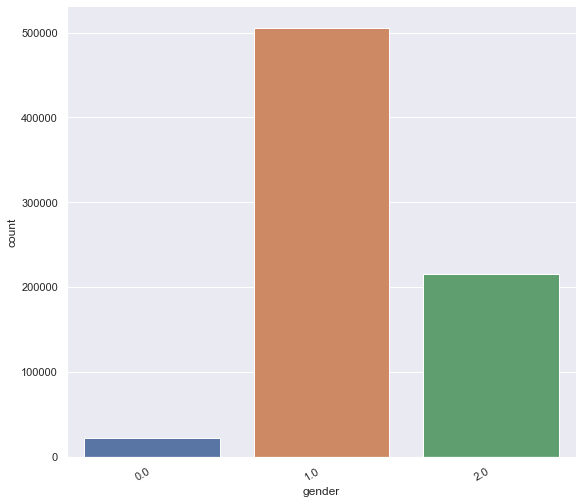

In [49]:
sns.catplot(x='gender', kind='count', data=df, height=8).fig.autofmt_xdate()

## 同时我们注意观察训练集和测试集是否同分布：

我们观察到gender字段出现了不同分布的情况的，我们采取了归一化处理的方法，将因为数据清洗质量造成的不同分布消除。

# 2.特征工程

1) 关联规则

关联规则是形如X-->Y的蕴涵式，其中，X和Y分别称为关联规则的先导(antecedent或

left - hand -side, )和后继(consequent或right - hand - side,RHS) 。其中，关联规则XY，存在支持度和信任度。

有一个著名的笑话就是，在一家超市里，有一个有趣的现象：尿布和啤酒赫然摆在一起出售。但是这个奇怪的举措却使尿布和啤酒的销量双双增加了。这不是一个笑话，而是发生在美国沃尔玛连锁店超市的真实案例，并一直为商家所津津乐道。受max-encoding的方法的启发，我们对有关联关系的话费字段，1_total_fee, 2_total_fee,3_total_fee, 4_total_fee四个字段的构建关联规则，这样可以利用整体信息，对话费字段这个强特征进行降维编码。使得其数据更加具有代表性。这种特征对结果也有很强的正反馈。我们提取了话费的最频繁二项集，把一月的话费对应的话费作为特征使用。

其实这里有更好的方式，对于对偶形式的数据也更通用，大家可以结合DeepWalk，nove2vec，Line，SDNE的思路想一下。


2) 业务特征

业务特征的部分，我们深入研究了联通的套餐消费场景，从比赛的一开始，首先就通过联通官网以及消费论坛认真的开始调研工作，深入了解了联通的各种套餐特点和用户群差别。

通过熟悉套餐的特性，我们可以为各种特定用户群推荐适宜他们的套餐，比如
* 腾讯天王卡玩腾讯游戏看腾讯视频不花钱是深度腾讯用户的福音，
* 蚂蚁大宝卡则可以赠送2g无差别流量给高流量消费者。

联通传统套餐的各种优惠活动，比如预充值冲100返流量和话费，适合平时那些流量和话费不够用的用户，充值返话费则适合那些薅羊毛的用户。

对此我们针对用户的流量和通话做了一系列特征，比例、差值，求和等，力求尽可能的描绘出一幅用户画像。

提出了以下几种针对业务的特征：

1.     话费减去16元是否是整数

2.     流量的有效数字是否是27的整数倍

3.     话费的有效数字能否被15乘除

4.     话费是否是整数（用户可能未超套餐）

5.     连续两个月套餐的差值能否被5,10,15,27，30等计费单元整除

6.     四个月话费的最小值

7.     计算流量的平均单价

8.     计算通话时间的平均单价

9.     等等…

3) 引导学习

在机器学习中，针对不同阶段的同源数据，通常有迁移学习和直接拼接数据的方法来利用数据，可以利用不同分布的数据提升结果。

迁移学习直接对预测概率编码为被迁移模型的特征，可以保证同分布，但是不能充分利用数据；

拼接充分利用数据，但是出来的结果不能同分布；为此，我们提出一种称为“引导学习”的方法。

结构化数据的迁移学习方法：用不同分布的数据训练得到模型，预测出来的概率作为新任务的特征编码。与一般迁移学习不同的是，嫁接学习强调利用因时间演化或者采样造成的分布产生变化的同源数据。因为被一名植物分类学家在比赛中最先使用，因此也被戏称为“嫁接学习”。

在比赛过程中我们对各种数据迁移方法进行了比较，首先是全部初赛数据的迁移学习，但是效果并不显著。于是我们考虑增加复赛数据一起训练作为贝叶斯正则项，效果非常好。我们更深入的研究复赛数据的添加方式。如下:

   1.直接将初赛和复赛数据拼接

   2.拼接后将初复赛数据增加一列特征标注是否为复赛数据

   3.拼接后将网络套餐和传统套餐分别训练。

通过训练的结果可以看到：直接得到的结果里第2项最好，因为它通过特征标注保证了在这个模型里初赛和复赛数据有各自的分布；将输出的结果用于迁移则第1项最好，因为这个模型更加关注数据本身的影响而不考虑一同训练两组数据不同。实验结果如下表所示：